In [14]:
import math
import random
from VRGDA_lib import *


In [15]:

"""
Multiple    Rarity
6           30.55%
7           26.18%
8           22.91%
9           20.36%
"""

rarities = [0.3055, 0.2618, 0.2291, 0.2036]
multiples = [6, 7, 8, 9]
white_list_num = 2000

# total 2000 mint whitelist
# print([2000 * rarities[i] for i in range(4)])
# [611.0, 523.5999999999999, 458.2, 407.2]
# after Round
# m_distribution = [611, 523, 458, 407]
m_distribution = [round(white_list_num * rarities[i]) for i in range(len(multiples))]
print("multiple distribution: ", m_distribution)




def single_goo(time_elasped):

    m_goo = []
    for i in range(len(multiples)):
        m_goo.append(compute_goo_balance(multiples[i], 0, time_elasped))

    return m_goo


def sum_goo(time_elasped):

    one_goo = single_goo(time_elasped)
    total_goo = []
    for i in range(len(m_distribution)):
        total_goo.append(one_goo[i] * m_distribution[i])

    return sum(total_goo), total_goo


final_day = 10

begin_goo = single_goo(1)
end_goo = single_goo(final_day)

print("from 1st day to {}st day one Golbers produced GOO".format(final_day))
print("M=6 1st day {:.4f} final day {:.4f}".format(begin_goo[0], end_goo[0]))
print("M=7 1st day {:.4f} final day {:.4f}".format(begin_goo[1], end_goo[1]))
print("M=8 1st day {:.4f} final day {:.4f}".format(begin_goo[2], end_goo[2]))
print("M=9 1st day {:.4f} final day {:.4f}".format(begin_goo[3], end_goo[3]))
print("")

(_, begin_goo) = sum_goo(1)
(_, end_goo) = sum_goo(final_day)

print("from 1st day to {}st day all Golbers produced GOO".format(final_day))
print("M=6 1st day {:.4f} final day {:.4f}".format(begin_goo[0], end_goo[0]))
print("M=7 1st day {:.4f} final day {:.4f}".format(begin_goo[1], end_goo[1]))
print("M=8 1st day {:.4f} final day {:.4f}".format(begin_goo[2], end_goo[2]))
print("M=9 1st day {:.4f} final day {:.4f}".format(begin_goo[3], end_goo[3]))


multiple distribution:  [611, 524, 458, 407]
from 1st day to 10st day one Golbers produced GOO
M=6 1st day 1.5000 final day 150.0000
M=7 1st day 1.7500 final day 175.0000
M=8 1st day 2.0000 final day 200.0000
M=9 1st day 2.2500 final day 225.0000

from 1st day to 10st day all Golbers produced GOO
M=6 1st day 916.5000 final day 91650.0000
M=7 1st day 917.0000 final day 91700.0000
M=8 1st day 916.0000 final day 91600.0000
M=9 1st day 915.7500 final day 91575.0000


In [16]:

time_step = 0.001

"""
4 whitelist holders
"""
print("4 holders")

gobblers = ArtGobblers()
holders = [Holder(6), Holder(7), Holder(8), Holder(9)]
random.shuffle(holders)

cur_t = 0
while cur_t < final_day:
    gobblers.update(cur_t)
    gobblers_price = gobblers.last_price
    for _holder in holders:
        _holder.update_balance(cur_t)
        if _holder.balance >= gobblers_price:
            gobblers.mint_from_goo(_holder, cur_t)
    cur_t += time_step

print("gobblers last_price", gobblers.last_price)
print("gobblers last_price", gobblers.num_sold)
print("final gobblers hold num: ", [_holder.gobblers for _holder in holders])
print("")


"""
many whitelist holders
"""
print("2000 holders")

gobblers = ArtGobblers()
holders = []

for i in range(len(multiples)):
    for j in range(m_distribution[i]):
        holders.append(Holder(multiples[i]))

random.shuffle(holders)

cur_t = 0
x_labels_gobblers = []
y_data_gobblers = []
# compare hold group
ydata_m6 = []
ydata_m7 = []
ydata_m8 = []
ydata_m9 = []

while cur_t < final_day:
    gobblers.update(cur_t)
    gobblers_price = gobblers.last_price
    for _holder in holders:
        _holder.update_balance(cur_t)
        if _holder.balance >= gobblers.last_price:
            gobblers.mint_from_goo(_holder, cur_t)

    x_labels_gobblers.append(cur_t)
    y_data_gobblers.append(gobblers_price)

    m_goo = single_goo(cur_t)
    ydata_m6.append(m_goo[0])     # multiple 6
    ydata_m7.append(m_goo[1])     # multiple 7
    ydata_m8.append(m_goo[2])     # multiple 8
    ydata_m9.append(m_goo[3])     # multiple 9

    cur_t += time_step

print("gobblers last_price", gobblers.last_price)
print("gobblers num_sold", gobblers.num_sold)
# print("final gobblers hold num: ", [_holder.gobblers for _holder in holders])
print("")


4 holders
day 3.17 mint_from_goo price 22.5528 buyer m0 9 m 16.33 gobblers 2 balance 0.0002 total cost 22.5528
day 3.34 mint_from_goo price 22.2619 buyer m0 8 m 15.33 gobblers 2 balance 0.0092 total cost 22.2619
day 3.53 mint_from_goo price 21.7962 buyer m0 7 m 14.33 gobblers 2 balance 0.0104 total cost 21.7962
day 3.75 mint_from_goo price 21.1118 buyer m0 6 m 13.33 gobblers 2 balance 0.0045 total cost 21.1118
day 5.01 mint_from_goo price 13.9380 buyer m0 9 m 23.659999999999997 gobblers 3 balance 0.0066 total cost 36.4908
day 5.18 mint_from_goo price 13.7378 buyer m0 8 m 22.66 gobblers 3 balance 0.0102 total cost 35.9997
day 5.40 mint_from_goo price 13.3064 buyer m0 7 m 21.66 gobblers 3 balance 0.0086 total cost 35.1026
day 5.67 mint_from_goo price 12.6940 buyer m0 6 m 20.66 gobblers 3 balance 0.0006 total cost 33.8057
day 6.31 mint_from_goo price 10.5250 buyer m0 9 m 30.989999999999995 gobblers 4 balance 0.0077 total cost 47.0157
day 6.49 mint_from_goo price 10.3431 buyer m0 8 m 29.99

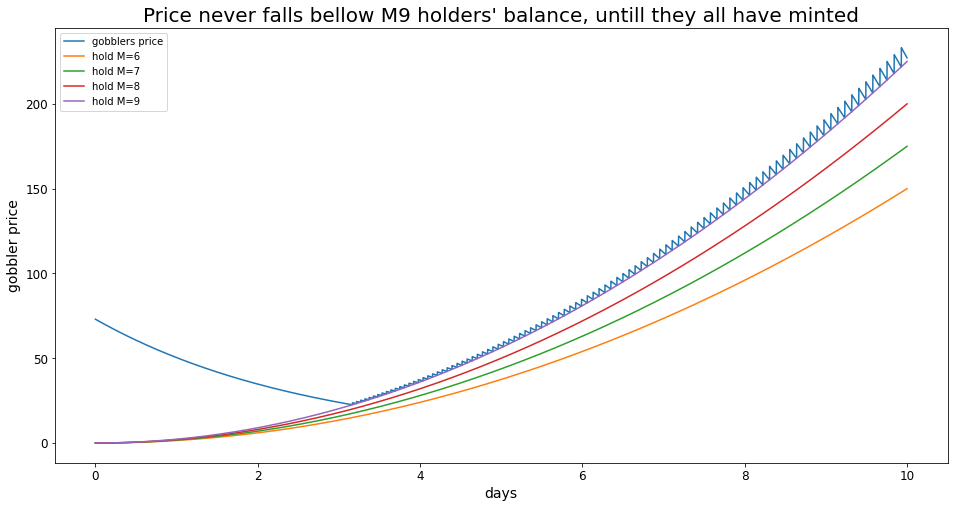

In [35]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Price never falls bellow M9 holders\' balance, untill they all have minted', {'fontsize': 20})
ax.set_xlabel('days', {'fontsize': 14})
ax.set_ylabel('gobbler price', {'fontsize': 14})
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.plot(x_labels_gobblers, y_data_gobblers)
ax.plot(x_labels_gobblers, ydata_m6)
ax.plot(x_labels_gobblers, ydata_m7)
ax.plot(x_labels_gobblers, ydata_m8)
ax.plot(x_labels_gobblers, ydata_m9)
custom_lines = [
    Line2D(x_labels_gobblers, y_data_gobblers, color='tab:blue'),
    Line2D(x_labels_gobblers, ydata_m6, color='tab:orange'),
    Line2D(x_labels_gobblers, ydata_m7, color='tab:green'),
    Line2D(x_labels_gobblers, ydata_m8, color='tab:red'),
    Line2D(x_labels_gobblers, ydata_m9, color='tab:purple'),
]
ax.legend(custom_lines, ['gobblers price', 'hold M=6',
          'hold M=7', 'hold M=8', 'hold M=9'])

fig.savefig('gobblers-price.png', transparent=True)
